In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import math
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('E:\\iPython_Notebooks\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


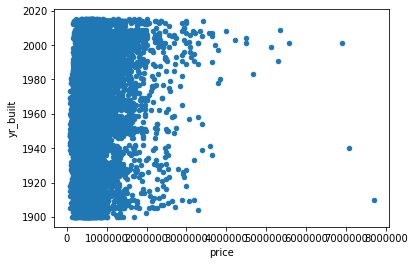

In [6]:
data.plot(kind='scatter',x='price',y='yr_built')

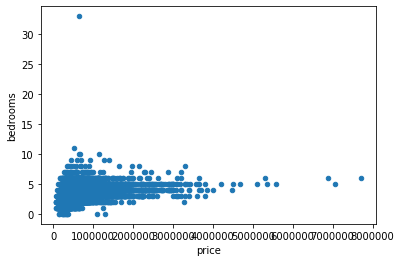

In [7]:
data.plot(kind='scatter',x='price',y='bedrooms')

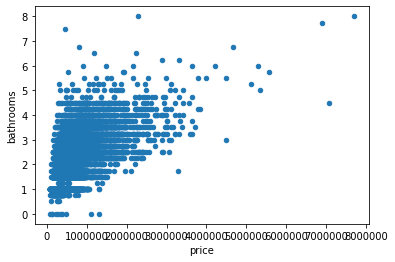

In [8]:
data.plot(kind='scatter',x='price',y='bathrooms')

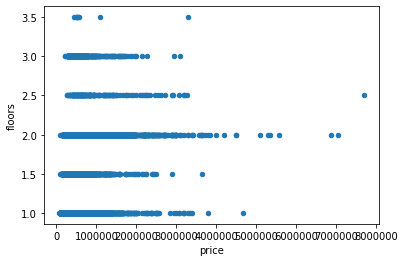

In [9]:
data.plot(kind='scatter',x='price',y='floors')

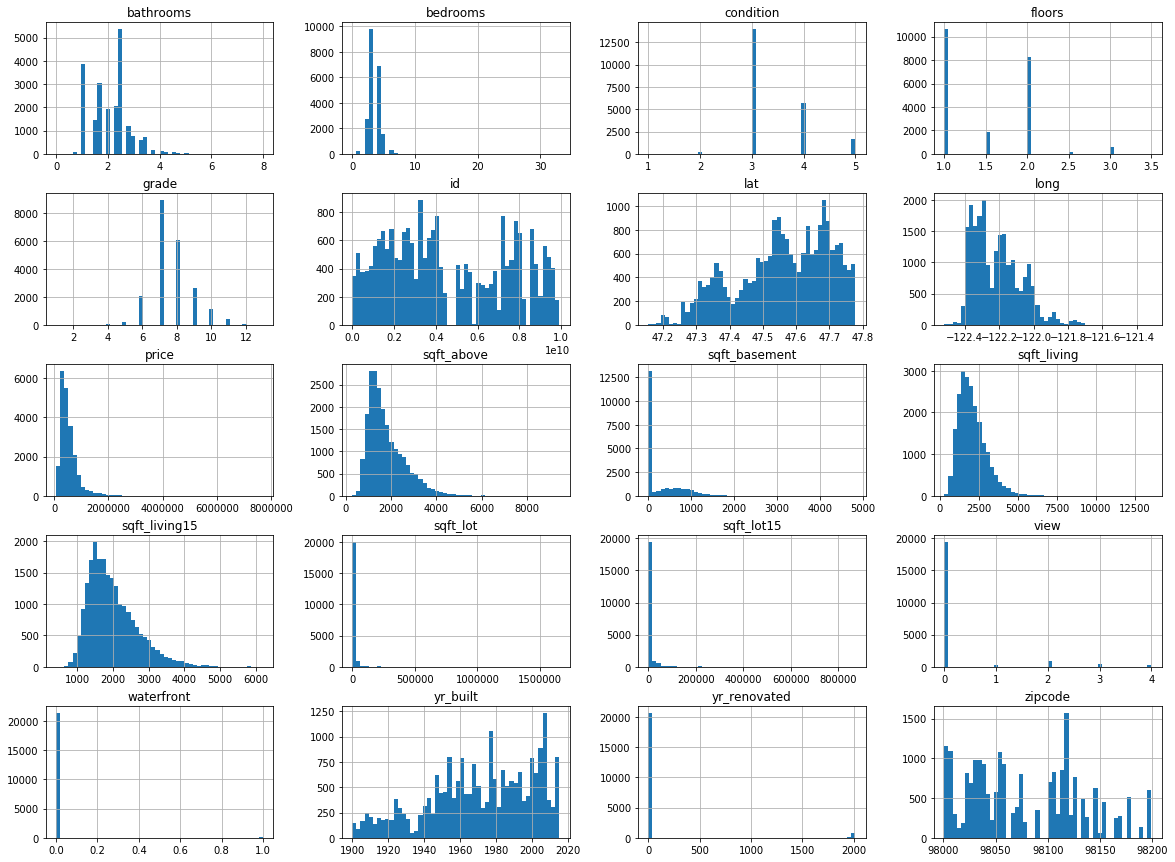

In [10]:
data.hist(bins=50, figsize=(20,15)) 
plt.show()

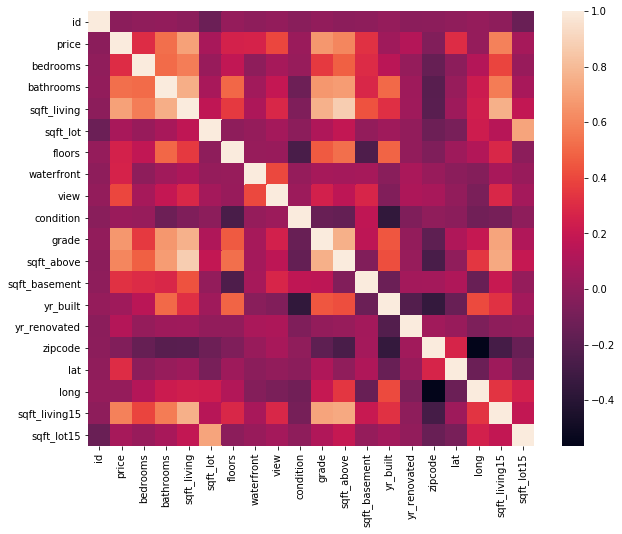

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr()) #Correlation between columns

In [14]:
x=data.drop(['price','id','date'],axis=1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5098,3,2.25,2110,11319,2.0,0,0,4,8,2110,0,1978,0,98072,47.7420,-122.105,1860,11319
17829,3,2.50,1350,2053,3.0,0,0,3,8,1350,0,2005,0,98117,47.6758,-122.386,1350,4150
6888,4,2.50,2760,5564,2.0,0,0,3,7,2760,0,2001,0,98056,47.4814,-122.189,2670,5626
7964,4,2.50,2680,9185,2.0,0,0,3,9,2680,0,1989,0,98029,47.5738,-121.992,2810,8505
17394,1,0.75,480,9750,1.0,0,0,2,4,480,0,1948,0,98146,47.4982,-122.362,1550,9924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,3,2.00,1850,8208,1.0,0,0,4,7,1180,670,1970,0,98023,47.3109,-122.362,1790,8174
7291,3,1.75,2190,7021,1.0,0,2,4,7,1390,800,1953,0,98178,47.5033,-122.232,2180,7155
17728,4,1.50,1580,10260,1.0,0,0,4,7,1030,550,1955,0,98007,47.5984,-122.147,1520,7000
7293,3,2.00,1410,6600,1.0,0,0,4,7,1410,0,1990,0,98042,47.3596,-122.089,1750,7150


In [15]:
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)
print(lr.intercept_)
print(lr.coef_)

3204034.665340971
[-3.41381570e+04  3.85222372e+04  1.03205005e+02  6.73720985e-02
  2.45994906e+03  5.63146375e+05  5.13726974e+04  2.70491996e+04
  1.00968006e+05  6.87692991e+01  3.44357064e+01 -2.50615350e+03
  1.54807732e+01 -5.50332356e+02  5.90280121e+05 -2.20304092e+05
  2.71779016e+01 -3.10580675e-01]


In [16]:
from sklearn.metrics import mean_squared_error
import math
train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)
print("RMSE Train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test:",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train: 201875.06583449742
RMSE Test: 200082.39056673177


In [17]:
lr.score(x_train, y_train)

0.6945469702842321

In [18]:
lr.score(x_test, y_test)

0.7097660077351848